# Tech Job Market and Salaries Analysis 

For our final project, we have selected the Stack Overflow Developer Survey dataset, 
which contains detailed responses from developers regarding their job roles, skills, 
technologies used, and salary information. This dataset is particularly relevant to the 
tech industry, which is a major focus of our group, and will provide insights into the tech 
job market by collecting responses from developers worldwide. It covers various topics 
such as job roles, salary, coding activities, education, technology usage, and job 
satisfaction.<br>

Team Eyy<br>
Members:  
- Julianne Kristine D. Aban 
- Derich Andre G. Arcilla 
- Jennifer Bendoy 
- Richelle Ann C. Candidato 
- Marc Francis B. Gomolon 
- Phoebe Kae A. Plasus

##### Data Preparation

LOADING DATA SET & LIBRARIES

In [1]:
import pandas as pd
import numpy as np                              

# Load the dataset
# df = pd.read_csv('survey_results_filtered.csv')
df = pd.read_csv('survey_results_public.csv')
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [2]:
# Expand display settings to show all columns
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', 200)     # Adjust rows if needed


In [3]:
# Display column information: name, number of missing values, and dtype
column_info = pd.DataFrame({
    'Column Name': df.columns,
    'Missing Values': df.isnull().sum(),
    'Data Type': df.dtypes
}).reset_index(drop=True)

# Print the column information
print(column_info)

                        Column Name  Missing Values Data Type
0                        ResponseId               0     int64
1                        MainBranch               0    object
2                               Age               0    object
3                        Employment               0    object
4                        RemoteWork           10631    object
5                             Check               0    object
6                  CodingActivities           10971    object
7                           EdLevel            4653    object
8                         LearnCode            4949    object
9                   LearnCodeOnline           16200    object
10                          TechDoc           24540    object
11                        YearsCode            5568    object
12                     YearsCodePro           13827    object
13                          DevType            5992    object
14                          OrgSize           17957    object
15      

In [4]:
# Calculate the percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Filter columns with more than 50% missing values
high_missing_cols = missing_percentage[missing_percentage > 50]
print("Columns with more than 50% missing values:")
print(high_missing_cols)


Columns with more than 50% missing values:
PlatformAdmired                  52.050063
EmbeddedHaveWorkedWith           66.052845
EmbeddedWantToWorkWith           73.103901
EmbeddedAdmired                  74.428840
MiscTechAdmired                  54.771765
AIToolInterested in Using        53.098400
AIToolNot interested in Using    62.690832
AINextMuch more integrated       79.464217
AINextNo change                  80.900714
AINextMore integrated            62.669438
AINextLess integrated            96.401119
AINextMuch less integrated       98.245641
ICorPM                           54.458487
WorkExp                          54.677018
Knowledge_1                      56.196036
Knowledge_2                      57.178660
Knowledge_3                      57.065575
Knowledge_4                      57.164907
Knowledge_5                      57.394135
Knowledge_6                      57.418586
Knowledge_7                      57.550010
Knowledge_8                      57.580574
Knowledge_9

In [5]:
# Drop columns with more than 50% missing values
df_cleaned = df.drop(columns=high_missing_cols.index)
print(f"Dataset shape after dropping columns: {df_cleaned.shape}")

# Show the names of the remaining columns
remaining_columns = df_cleaned.columns
print(f"Remaining columns ({len(remaining_columns)}):")
print(remaining_columns)


Dataset shape after dropping columns: (65437, 70)
Remaining columns (70):
Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize',
       'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse',
       'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'WebframeAdmired', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'ToolsTechAdmired',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith',
       'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use',
       'Offi

In [6]:
# Fill missing numerical values with median
numerical_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
df_cleaned[numerical_cols] = df_cleaned[numerical_cols].fillna(df_cleaned[numerical_cols].median())

# Fill missing categorical values with mode
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns
df_cleaned[categorical_cols] = df_cleaned[categorical_cols].fillna(df_cleaned[categorical_cols].mode().iloc[0])

# Check for missing values in numerical columns
print("Missing values in numerical columns:")
print(df_cleaned[numerical_cols].isnull().sum())

# Check for missing values in categorical columns
print("Missing values in categorical columns:")
print(df_cleaned[categorical_cols].isnull().sum())



Missing values in numerical columns:
ResponseId    0
CompTotal     0
dtype: int64
Missing values in categorical columns:
MainBranch                        0
Age                               0
Employment                        0
RemoteWork                        0
Check                             0
CodingActivities                  0
EdLevel                           0
LearnCode                         0
LearnCodeOnline                   0
TechDoc                           0
YearsCode                         0
YearsCodePro                      0
DevType                           0
OrgSize                           0
PurchaseInfluence                 0
BuyNewTool                        0
BuildvsBuy                        0
TechEndorse                       0
Country                           0
Currency                          0
LanguageHaveWorkedWith            0
LanguageWantToWorkWith            0
LanguageAdmired                   0
DatabaseHaveWorkedWith            0
DatabaseWantToW

In [7]:
#Save Cleaned File
df_cleaned.to_csv('cleaned_survey_results.csv', index=False)


CLEANING CODE OF EXPERIENCE

In [8]:
# # Cleaning Years of Experience YearsCode(overall coding experience) && YearsCodePro (coding experience as a professional)

# # Step 1: Replace 'NA' strings with NaN
# df.replace('NA', pd.NA, inplace=True)

# # Step 2: Convert 'YearsCode' and 'YearsCodePro' columns to numeric, 
# # forcing errors to NaN for any other non-numeric values
# df['YearsCode'] = pd.to_numeric(df['YearsCode'], errors='coerce')
# df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# # Step 3: Impute missing values with the mean of each column
# df['YearsCode'] = df['YearsCode'].fillna(df['YearsCode'].mean())
# df['YearsCodePro'] = df['YearsCodePro'].fillna(df['YearsCodePro'].mean())

# # Round the results to whole numbers (integers)
# df['YearsCode'] = df['YearsCode'].round().astype(int)
# df['YearsCodePro'] = df['YearsCodePro'].round().astype(int)

# # Print the cleaned DataFrame with the two columns
# # print(df[['YearsCode', 'YearsCodePro']])

CLEANING EDUCATION LEVEL

In [9]:
# # Clean the EdLevel column:
# # - Remove text in parentheses (e.g., "(e.g. American high school, etc.)")
# # - Strip any extra spaces
# df['EdLevel'] = df['EdLevel'].apply(lambda x: re.sub(r'\(.*\)', '', str(x)).strip())

# # Mapping dictionary for converting text to numeric values
# edlevel_mapping = {
#     'Primary/elementary school': 1,
#     'Secondary school': 2,
#     "Bachelor's degree": 3,
#     'Associate degree': 4,
#     "Master's degree": 5,
#     'Professional degree': 6,
#     'Some college/university study without earning a degree': 0,
#     'Something else': 0
# }

# # Replace text with numeric values according to the mapping
# df['EdLevel'] = df['EdLevel'].replace(edlevel_mapping)

# # Convert the column to numeric values (in case there are still mixed types)
# df['EdLevel'] = pd.to_numeric(df['EdLevel'], errors='coerce')

# # Handle missing values (NaN) and replace with -1
# df['EdLevel'] = df['EdLevel'].fillna(-1)

# # Print only the cleaned 'EdLevel' column
# # print(df['EdLevel'])

CLEANING ORGSIZE

In [10]:
# # Display unique values in OrgSize and their counts
# print("Unique values in OrgSize before parsing:")
# print(df_cluster['OrgSize'].value_counts(dropna=False))

In [11]:
# # Function to parse OrgSize values
# def parse_org_size(value):
#     if pd.isnull(value):  # Handle missing values
#         return np.nan
#     value = str(value).lower()
    
#     # Handle ranges like "100 to 499 employees"
#     if "to" in value:
#         try:
#             return int(value.split("to")[0].replace(",", "").strip())
#         except ValueError:
#             return np.nan
    
#     # Handle "10,000 or more employees"
#     elif "or more" in value:
#         try:
#             return int(value.split("or")[0].replace(",", "").strip())
#         except ValueError:
#             return np.nan

#     # Handle freelancer entries
#     elif "just me" in value or "freelancer" in value:
#         return 1  # Single individual

#     # Handle unknown or NA
#     elif "i don't know" in value or value in ["na"]:
#         return np.nan

#     # Default fallback for unexpected values
#     else:
#         return np.nan

# # Display original unique values in OrgSize
# print("Unique values in OrgSize before parsing:")
# print(df_cluster['OrgSize'].value_counts(dropna=False))

# # Apply parsing to OrgSize column
# df_cluster['OrgSize'] = df_cluster['OrgSize'].map(parse_org_size)

# # Fill missing values with the median
# df_cluster['OrgSize'] = df_cluster['OrgSize'].fillna(df_cluster['OrgSize'].median())

# # Display transformed OrgSize values after parsing
# print("\nUnique values in OrgSize after parsing:")
# print(df_cluster['OrgSize'].value_counts())

# # Optional: Display final values after filling missing values
# print("\nUnique values in OrgSize after filling missing values:")
# print(df_cluster['OrgSize'].value_counts())


CLEANING LANGUAGE HAVE WORKED WITH

In [12]:
# # Handle NaN values by filling them with an empty string or dropping rows with NaN values
# df['LanguageHaveWorkedWith'] = df['LanguageHaveWorkedWith'].fillna('')

# # Split the 'LanguageHaveWorkedWith' column by semicolon
# df['Technologies'] = df['LanguageHaveWorkedWith'].str.split(';')

# # Standardize technology names (strip extra spaces, title case)
# df['Technologies'] = df['Technologies'].apply(lambda x: [tech.strip().title() for tech in x if tech])

# # Flatten the list of technologies and create a set of unique technologies
# all_technologies = set([tech for sublist in df['Technologies'] for tech in sublist])

# # One-hot encode by creating a column for each technology
# for tech in all_technologies:
#     df[tech] = df['Technologies'].apply(lambda x: 1 if tech in x else 0)

# # Drop the original 'LanguageHaveWorkedWith' and 'Technologies' columns
# df.drop(columns=['LanguageHaveWorkedWith', 'Technologies'], inplace=True)

# # Print the one-hot encoded results
# # print(df)

CLEANING DATABASE HAVE WORKED WITH

In [13]:
# # Handle NaN values by filling them with an empty string or dropping rows with NaN values
# df['DatabaseHaveWorkedWith'] = df['DatabaseHaveWorkedWith'].fillna('')

# # Function to clean and one-hot encode a column
# def clean_and_encode(column_name):
#     # Split the column by semicolon
#     df[column_name + '_Technologies'] = df[column_name].str.split(';')
    
#     # Standardize technology names (strip extra spaces, title case)
#     df[column_name + '_Technologies'] = df[column_name + '_Technologies'].apply(lambda x: [tech.strip().title() for tech in x if tech])
    
#     # Flatten the list of technologies and create a set of unique technologies
#     all_technologies = set([tech for sublist in df[column_name + '_Technologies'] for tech in sublist])
    
#     # One-hot encode by creating a column for each technology
#     for tech in all_technologies:
#         df[tech] = df[column_name + '_Technologies'].apply(lambda x: 1 if tech in x else 0)
    
#     # Drop the original technology columns
#     df.drop(columns=[column_name, column_name + '_Technologies'], inplace=True)

# # Clean and one-hot encode the 'DatabaseHaveWorkedWith' column
# clean_and_encode('DatabaseHaveWorkedWith')

CLEANING DEVTYPE

In [14]:
# # Replace "NA" with NaN (missing values) in DevType column
# df['DevType'] = df['DevType'].replace('NA', np.nan)

# # Define a mapping to group similar roles
# dev_type_mapping = {
#     'Academic researcher': 'Researcher',
#     'Blockchain': 'Developer',
#     'Cloud infrastructure engineer': 'Engineer',
#     'Data engineer': 'Data Professional',
#     'Data or business analyst': 'Data Professional',
#     'Data scientist or machine learning specialist': 'Data Professional',
#     'Database administrator': 'Data Professional',
#     'Designer': 'Designer',
#     'Developer Advocate': 'Developer',
#     'Developer Experience': 'Developer',
#     'Developer, AI': 'Developer',
#     'Developer back-end': 'Developer',
#     'Developer, desktop or enterprise applications': 'Developer',
#     'Developer, embedded applications': 'Developer',
#     'Developer, front-end': 'Developer',
#     'Developer, full-stack': 'Developer',
#     'Developer, game or graphics': 'Developer',
#     'Developer, mobile': 'Developer',
#     'Developer, QA or test': 'Developer',
#     'DevOps specialist': 'Engineer',
#     'Educator': 'Educator',
#     'Engineer site reliability': 'Engineer',
#     'Engineering manager': 'Manager',
#     'Hardware manager': 'Manager',
#     'Marketing or sales professional': 'Business',
#     'Others': 'Other',
#     'Product manager': 'Manager',
#     'Project manager': 'Manager',
#     'Research and Development role': 'Researcher',
#     'Scientist': 'Researcher',
#     'Security professional': 'Security',
#     'Senior Executive (C-Suite, VP)': 'Executive',
#     'Student': 'Student',
#     'System administrator': 'Engineer'
# }

# # Apply the mapping
# df['DevType'] = df['DevType'].map(dev_type_mapping)

# # Convert categorical column to numeric using a mapping for the grouped roles
# dev_type_numeric_mapping = {
#     'Researcher': 1,
#     'Developer': 2,
#     'Engineer': 3,
#     'Data Professional': 4,
#     'Designer': 5,
#     'Manager': 6,
#     'Business': 7,
#     'Other': 8,
#     'Educator': 9,
#     'Security': 10,
#     'Executive': 11,
#     'Student': 12
# }

# # Apply the numeric mapping to the 'DevType' column
# df['DevTypeNumeric'] = df['DevType'].map(dev_type_numeric_mapping)

# # Fill NaN values (optional, depending on your analysis)
# df['DevTypeNumeric'] = df['DevTypeNumeric'].fillna(-1)  # Use -1 or another placeholder for missing values


##### Exploratory Data Analysis (EDA)

In [15]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned dataset
df2 = pd.read_csv('cleaned_survey_results.csv')

# Display basic information about the dataset
df2.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIThreat,AIEthics,AIChallenges,TBranch,SurveyLength,SurveyEase
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,Technical documentation;Blogs;Written Tutorial...,API document(s) and/or SDK document(s);User gu...,10,2,"Developer, full-stack",20 to 99 employees,I have some influence,Start a free trial;Ask developers I know/work ...,Is ready-to-go but also customizable for growt...,APIs;Customization;Reputation for quality and ...,United States of America,EUR European Euro,110000.0,HTML/CSS;JavaScript;TypeScript,Python,Python,PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS),Amazon Web Services (AWS),React,React,React,.NET (5+),.NET (5+),Docker,Docker,Docker,Visual Studio Code,Visual Studio Code,Visual Studio Code,Windows,Windows,Jira,Jira,Jira,Microsoft Teams,Microsoft Teams,Microsoft Teams,ChatGPT,ChatGPT,ChatGPT,I have never visited Stack Overflow or the Sta...,A few times per week,Yes,Less than once per month or monthly,Quickly finding code solutions;Finding reliabl...,"No, not really",Yes,Very favorable,Increase productivity,Somewhat trust,"Good, but not great at handling complex tasks",Writing code;Debugging and getting help;Search...,No,Circulating misinformation or disinformation;M...,Don’t trust the output or answers;AI tools lac...,No,Appropriate in length,Easy
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",20 to 99 employees,I have some influence,Start a free trial;Ask developers I know/work ...,Is ready-to-go but also customizable for growt...,APIs;Customization;Reputation for quality and ...,United Kingdom of Great Britain and Northern I...,EUR European Euro,110000.0,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,.NET (5+),.NET (5+),Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,Jira,Jira,Jira,Microsoft Teams;Slack,Slack,Slack,ChatGPT,ChatGPT,ChatGPT,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",Favorabl

C:\Users\HP\AppData\Local\Temp\ipykernel_3240\4259444068.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, palette="Blues_d")


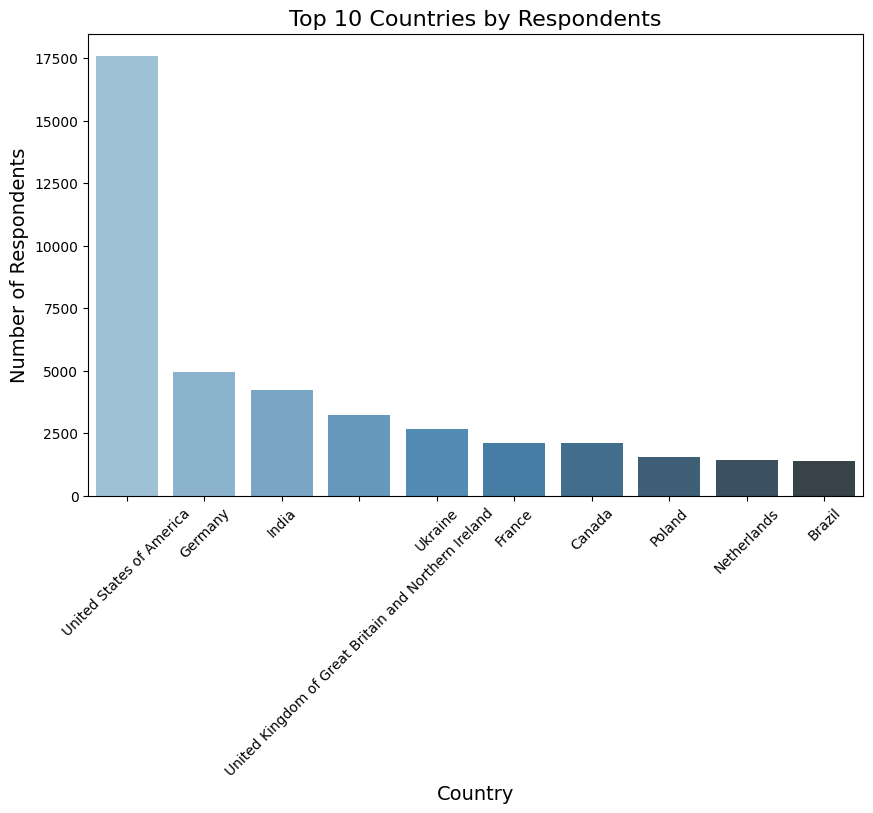

In [16]:
# Check if the 'Country' column exists, otherwise replace with the relevant column name
if 'Country' in df2.columns:
    country_counts = df2['Country'].value_counts().head(10)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=country_counts.index, y=country_counts.values, palette="Blues_d")
    plt.title('Top 10 Countries by Respondents', fontsize=16)
    plt.xlabel('Country', fontsize=14)
    plt.ylabel('Number of Respondents', fontsize=14)
    plt.xticks(rotation=45)
    plt.show()
else:
    print("No 'Country' column found in the dataset.")

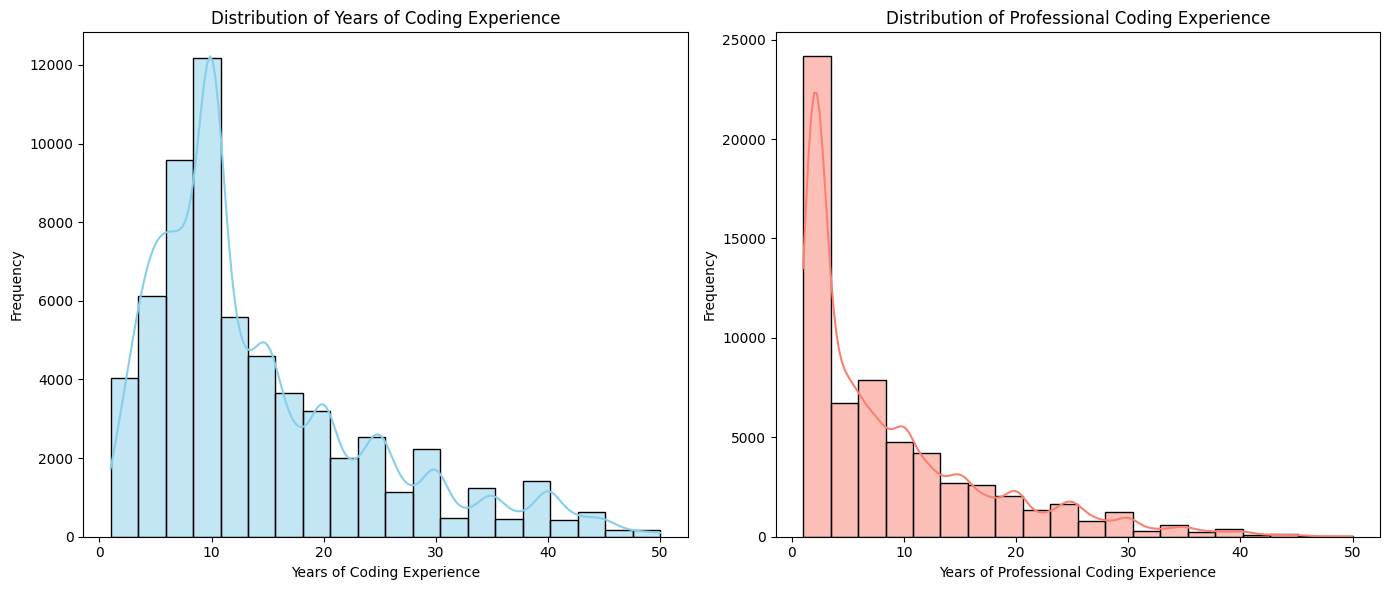

In [17]:
# Handle missing or invalid values for 'YearsCode' and 'YearsCodePro'
df2 = df2.dropna(subset=['YearsCode', 'YearsCodePro'])

# Convert 'YearsCode' and 'YearsCodePro' to numeric values
df2['YearsCode'] = pd.to_numeric(df2['YearsCode'], errors='coerce')
df2['YearsCodePro'] = pd.to_numeric(df2['YearsCodePro'], errors='coerce')

# Drop rows where conversion failed
df2 = df2.dropna(subset=['YearsCode', 'YearsCodePro'])

# Set up the figure for multiple plots
plt.figure(figsize=(14, 6))

# Plot 1: Distribution plot for YearsCode
plt.subplot(1, 2, 1)
sns.histplot(df2['YearsCode'], kde=True, color='skyblue', bins=20)
plt.title('Distribution of Years of Coding Experience')
plt.xlabel('Years of Coding Experience')
plt.ylabel('Frequency')

# Plot 2: Distribution plot for YearsCodePro
plt.subplot(1, 2, 2)
sns.histplot(df2['YearsCodePro'], kde=True, color='salmon', bins=20)
plt.title('Distribution of Professional Coding Experience')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# Demographic Analysis for Age

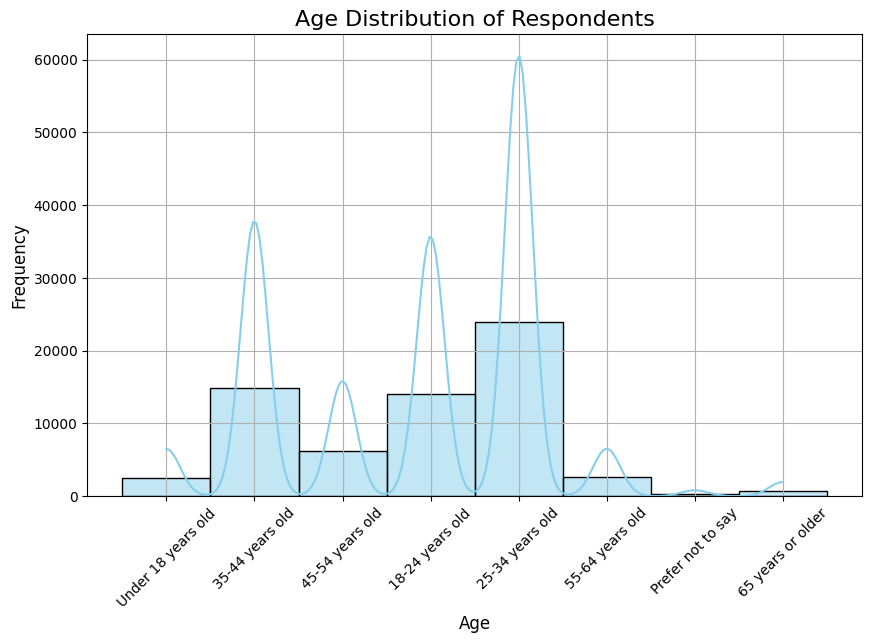

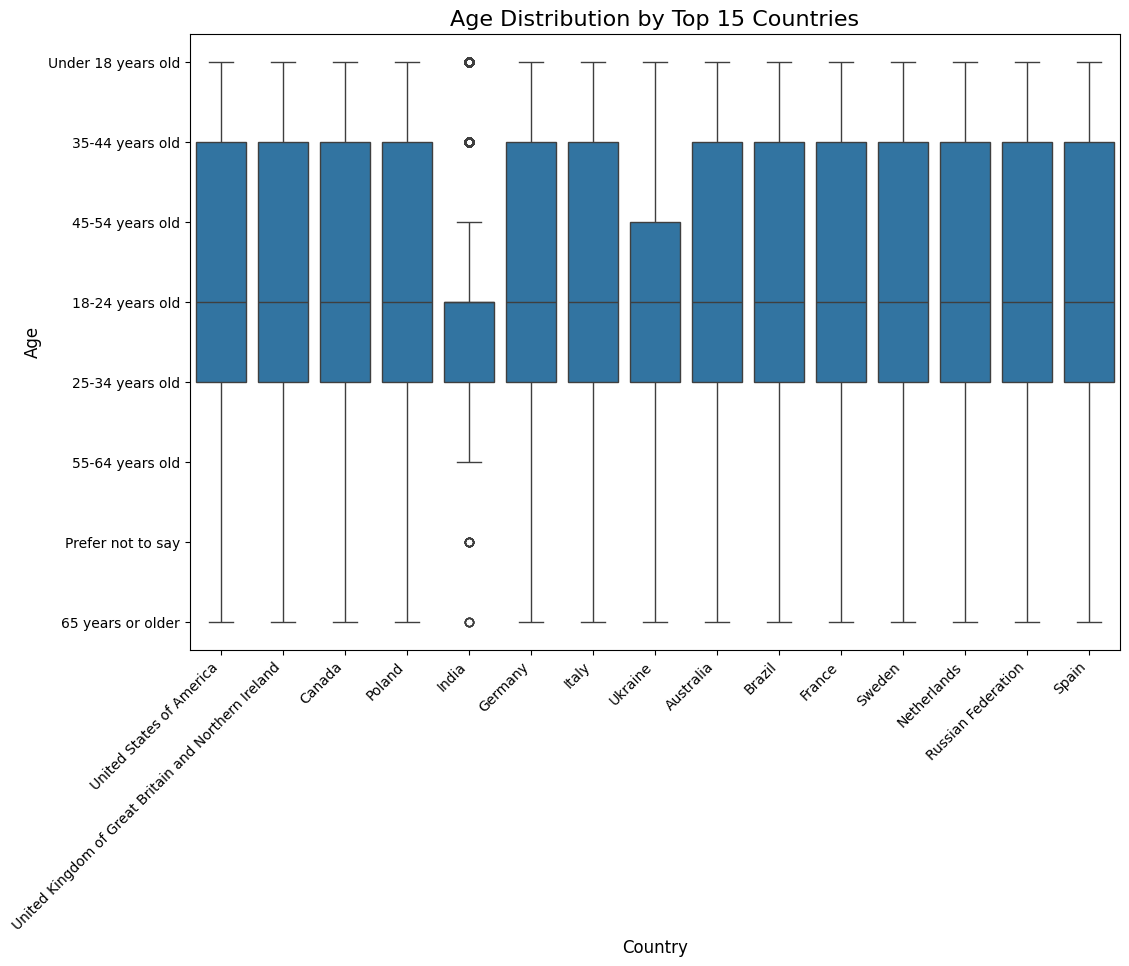

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of Respondents', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45) 
plt.grid(True)
plt.show()


# Get the top 15 countries by respondent count
top_countries = df['Country'].value_counts().head(15).index
filtered_df = df[df['Country'].isin(top_countries)]

# Plot the boxplot for top countries
plt.figure(figsize=(12, 8))
sns.boxplot(data=filtered_df, x='Country', y='Age')
plt.title('Age Distribution by Top 15 Countries', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()


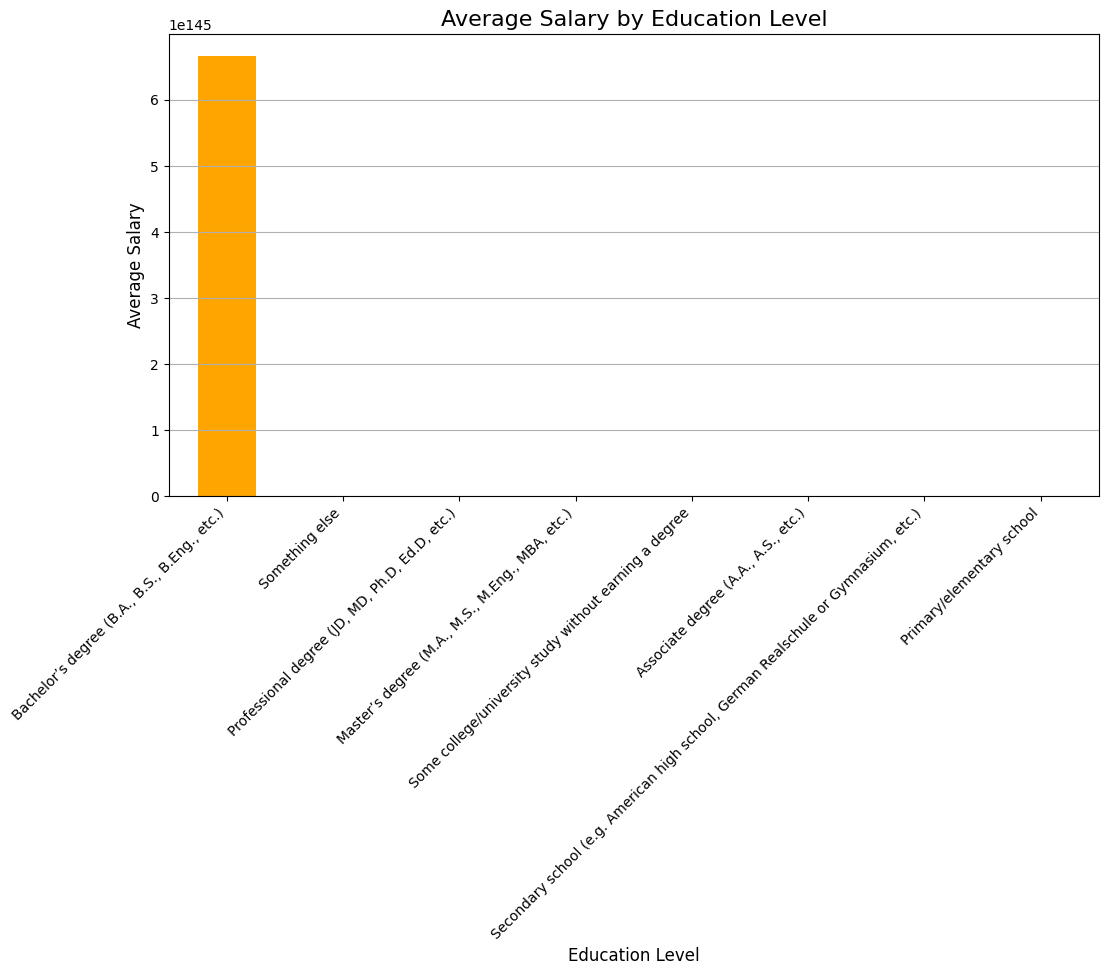

In [19]:
# Bar Chart for Salary by Education Level
avg_salary_by_education = df.groupby('EdLevel')['CompTotal'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
avg_salary_by_education.plot(kind='bar', color='orange')
plt.title('Average Salary by Education Level', fontsize=16)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Average Salary', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()


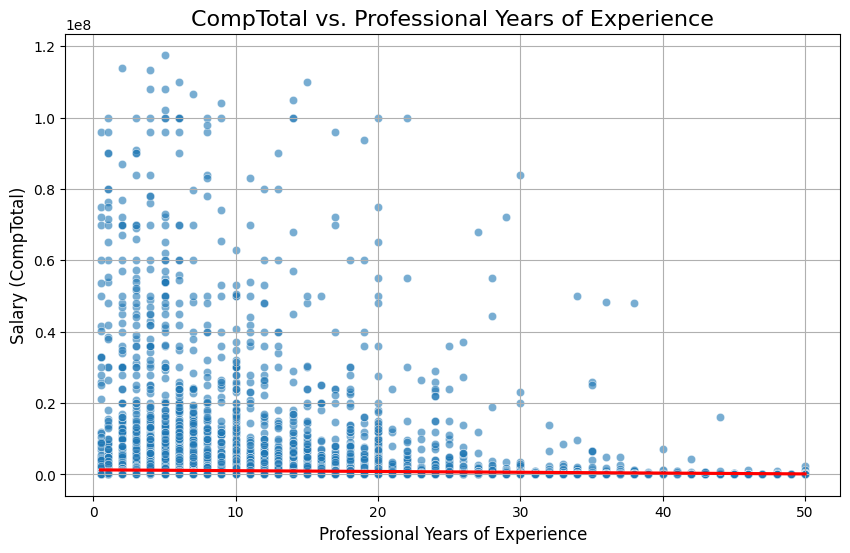

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cleaning 'YearsCodePro'
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': 0.5,
    'More than 50 years': 50,
    'NA': np.nan
}).astype(float)  # Convert to numeric

# Cleaning 'CompTotal'
df['CompTotal'] = df['CompTotal'].replace('NA', np.nan)  # Replace 'NA' with NaN
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')  # Convert to numeric

# Remove outliers in 'CompTotal' (e.g., >99th percentile)
q99 = df['CompTotal'].quantile(0.99)  # 99th percentile
df_cleaned = df[(df['CompTotal'] <= q99) & (df['CompTotal'] > 0)].dropna(subset=['YearsCodePro', 'CompTotal'])

# Scatter plot with trend line
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='YearsCodePro', y='CompTotal', alpha=0.6)
sns.regplot(data=df_cleaned, x='YearsCodePro', y='CompTotal', scatter=False, color='red')
plt.title('CompTotal vs. Professional Years of Experience', fontsize=16)
plt.xlabel('Professional Years of Experience', fontsize=12)
plt.ylabel('Salary (CompTotal)', fontsize=12)
plt.grid(True)
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_3240\189510769.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Age'] = df['Age'].replace(age_mapping).astype(float)


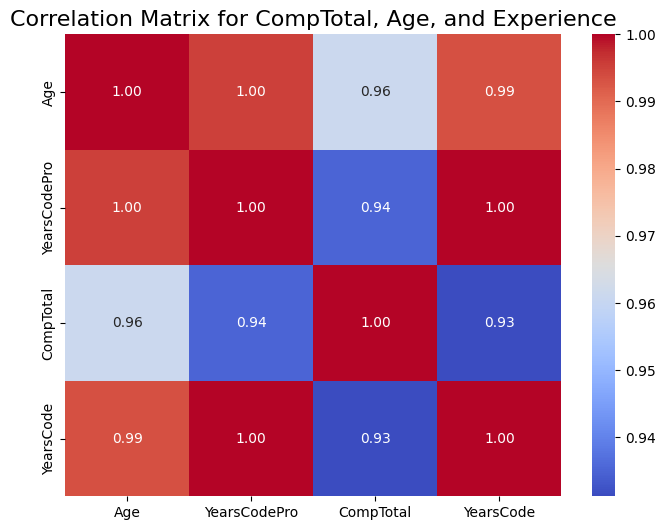

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example DataFrame with Age, YearsCodePro, CompTotal, YearsCode columns
data = {
    "Age": ["18-24 years old", "25-34 years old", "35-44 years old", "Prefer not to say", 
            "Under 18 years old", "65 years or older"],
    "YearsCodePro": [1, 5, 10, 3, 0, 30],
    "CompTotal": [60000, 80000, 120000, 75000, 50000, 150000],
    "YearsCode": [2, 6, 12, 4, 1, 35]
}

df = pd.DataFrame(data)

# Define the mapping for Age
age_mapping = {
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Under 18 years old': 17,
    'Prefer not to say': np.nan
}

# Replace Age column values with numeric equivalents
df['Age'] = df['Age'].replace(age_mapping).astype(float)

# Heatmap for Numeric Correlations
numeric_cols = ['Age', 'YearsCodePro', 'CompTotal', 'YearsCode']
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for CompTotal, Age, and Experience', fontsize=16)
plt.show()
